Actual Target is:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


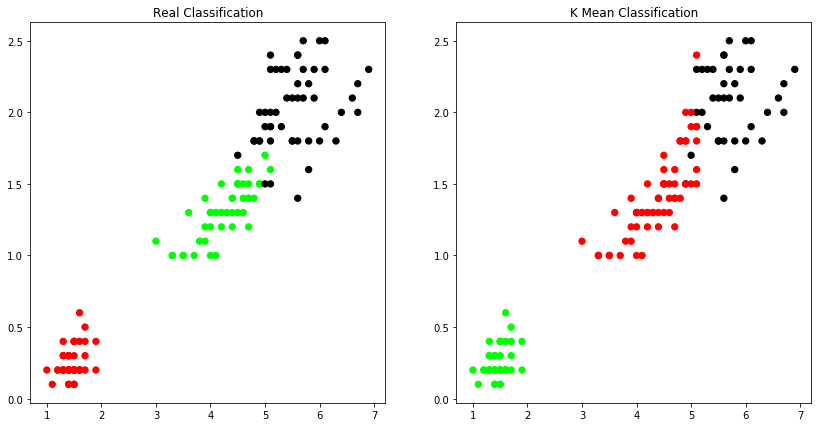


What KMeans thought: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
Accuracy of KMeans is  0.8933333333333333
Confusion Matrix for KMeans is 
 [[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]

      Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
58       0.916837    -0.362176      0.478571     0.132510
107      1.765012    -0.362176      1.444807     0.790671
70       0.068662     0.328414      0.592246     0.790671
63       0.310998    -0.362176      0.535409     0.264142
122      2.249683    -0.592373      1.672157     1.053935


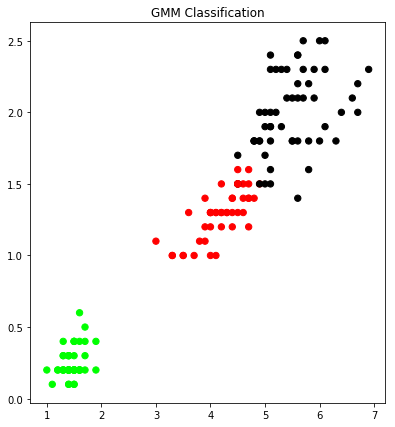


What EM thought: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Accuracy of EM is  0.9666666666666667
Confusion Matrix for EM is 
 [[50  0  0]
 [ 0 45  5]
 [ 0  0 50]]


In [8]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import pandas as pd
import numpy as np
import matplotlib
l1 = [0,1,2]

def rename(s):
    l2 = []
    for i in s:
        if i not in l2:
            l2.append(i)

    for i in range(len(s)):
        pos = l2.index(s[i])
        s[i] = l1[pos]

    return s

iris = datasets.load_iris()
X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']
print("Actual Target is:\n", iris.target)


model = KMeans(n_clusters=3)
model.fit(X)

colormap = np.array(['red', 'lime', 'black'])
plt.figure(figsize=(14,7))

plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')

plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('K Mean Classification')

plt.show()

km = rename(model.labels_)
print("\nWhat KMeans thought: \n", km)
print("Accuracy of KMeans is ",sm.accuracy_score(y, km))
print("Confusion Matrix for KMeans is \n",sm.confusion_matrix(y, km))

from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)
print("\n",xs.sample(5))

from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(xs)

y_cluster_gmm = gmm.predict(xs)

plt.figure(figsize=(14,7))
plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y_cluster_gmm], s=40)
plt.title('GMM Classification')
plt.show()

em = rename(y_cluster_gmm)
print("\nWhat EM thought: \n", em)
print("Accuracy of EM is ",sm.accuracy_score(y, em))
print("Confusion Matrix for EM is \n", sm.confusion_matrix(y, em))


Actual Target is:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


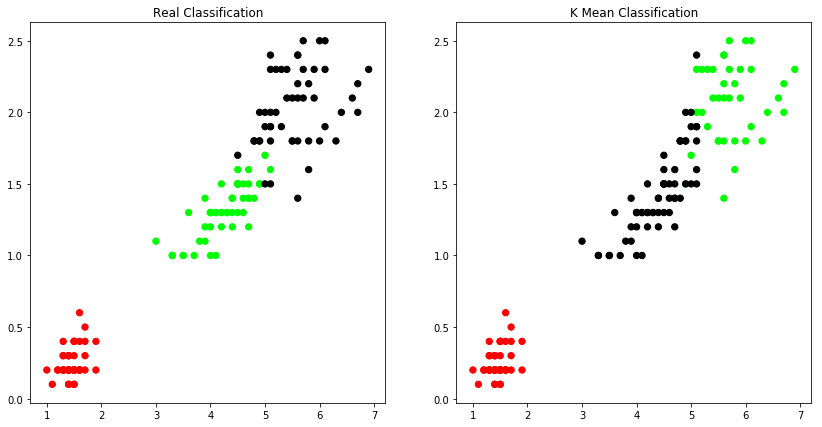


What KMeans thought: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
Accuracy of KMeans is  0.8933333333333333
Confusion Matrix for KMeans is 
 [[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]

      Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
1       -1.143017    -0.131979     -1.340227    -1.315444
6       -1.506521     0.788808     -1.340227    -1.183812
68       0.432165    -1.973554      0.421734     0.395774
125      1.643844     0.328414      1.274295     0.790671
95      -0.173674    -0.131979      0.251221     0.000878


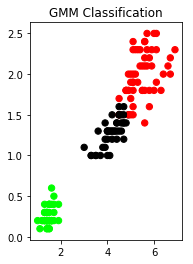


What EM thought: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Accuracy of EM is  0.9666666666666667
Confusion Matrix for EM is 
 [[50  0  0]
 [ 0 45  5]
 [ 0  0 50]]


In [3]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import pandas as pd
import numpy as np
import matplotlib
l1 = [0,1,2]

def rename(s):
    l2 = []
    for i in s:
        if i not in l2:
            l2.append(i)

    for i in range(len(s)):
        pos = l2.index(s[i])
        s[i] = l1[pos]

    return s

iris = datasets.load_iris()

X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']

y = pd.DataFrame(iris.target)
y.columns = ['Targets']

print("Actual Target is:\n", iris.target)


model = KMeans(n_clusters=3)
model.fit(X)

plt.figure(figsize=(14,7))
colormap = np.array(['red', 'lime', 'black'])
plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')

plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('K Mean Classification')
plt.show()

km = rename(model.labels_)
print("\nWhat KMeans thought: \n", km)
print("Accuracy of KMeans is ",sm.accuracy_score(y, km))
print("Confusion Matrix for KMeans is \n",sm.confusion_matrix(y, km))

from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)
print("\n",xs.sample(5))

from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(xs)

y_cluster_gmm = gmm.predict(xs)

plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y_cluster_gmm], s=40)
plt.title('GMM Classification')
plt.show()

em = rename(y_cluster_gmm)
print("\nWhat EM thought: \n", em)
print("Accuracy of EM is ",sm.accuracy_score(y, em))
print("Confusion Matrix for EM is \n", sm.confusion_matrix(y, em))